In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pd.set_option("display.max_columns", 47)

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#reading the data
df = pd.read_csv("dataset/top_100_artists.csv")

In [3]:
df.shape

(16252, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16252 entries, 0 to 16251
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   mode_confidence            16252 non-null  float64
 1   key_confidence             16252 non-null  float64
 2   tempo                      16252 non-null  float64
 3   energy                     16252 non-null  float64
 4   tempo_confidence           16252 non-null  float64
 5   time_signature             16252 non-null  int64  
 6   valence                    16252 non-null  float64
 7   name                       16252 non-null  object 
 8   echoprint_version          16252 non-null  float64
 9   mode                       16252 non-null  int64  
 10  explicit                   16252 non-null  int64  
 11  track_number               16252 non-null  int64  
 12  code_version               16252 non-null  float64
 13  speechiness                16252 non-null  flo

In [5]:
df.head()

mode_confidence  key_confidence    tempo  energy  tempo_confidence  \
0            0.627           0.853  128.235   0.516             0.729   
1            0.679           0.533  137.885   0.675             0.163   
2            0.139           0.000  106.931   0.543             0.732   
3            0.591           0.448   85.868   0.139             0.156   
4            0.408           0.394  132.094   0.630             0.336   

   time_signature  valence                                               name  \
0               4    0.823                 For You Blue - 1969 Glyn Johns Mix   
1               4    0.267                                      Ten More Days   
2               4    0.253                     Heartbreak (feat. Ben Burgess)   
3               3    0.323                                      Crazy For You   
4               4    0.883  Clarabella - Live At The BBC For "Pop Go The B...   

   echoprint_version  mode  explicit  track_number  code_version  speechiness  \
0               4.12     1         0             7          3.15       0.0991   
1               4.12     1         0             4          3.15       0.0306   
2               4.12     1         0            12          3.15       0.0352   
3               4.12     1         0             5          3.15       0.0507   
4               4.12     1         0            20          3.15       0.0729   

    duration  popularity artist_names  start_of_fade_out  liveness  \
0  174.32000          42  The Beatles          163.05634    0.4160   
1  245.81332          53       Avicii          234.22550    0.0972   
2  137.94395          26        Diplo          132.37115    0.1500   
3  208.04000          58        Adele          200.71909    0.1050   
4  159.94667          29  The Beatles          155.11510    0.5970   

   acousticness  instrumentalness  time_signature_confidence  key  \
0        0.6960          0.042500                      0.876    2   
1        0.0225          0.000013                      1.000    6   
2        0.0504          0.000000                      1.000    9   
3        0.9100          0.000000                      0.200    7   
4        0.6100          0.000000                      0.987    7   

   danceability  end_of_fade_in  num_samples  loudness  
0         0.734         0.23746      3843756   -13.881  
1         0.593         0.27315      5420184    -3.843  
2         0.701         0.12902      3041664    -7.395  
3         0.707         0.19741      4587282   -12.300  
4         0.521         0.08721      3526824   -11.097

In [6]:
num_values = df.select_dtypes(exclude='object')
cat_values = df.select_dtypes(include='object')

In [7]:
num_values.describe()

mode_confidence  key_confidence         tempo        energy  \
count     16252.000000    16252.000000  16252.000000  16252.000000   
mean          0.489871        0.451640    120.270544      0.651065   
std           0.169080        0.233582     28.795505      0.200084   
min           0.000000        0.000000      0.000000      0.003240   
25%           0.383000        0.291000     97.949000      0.524000   
50%           0.502000        0.461000    120.016000      0.671000   
75%           0.604000        0.612000    139.849000      0.807000   
max           1.000000        1.454000    232.412000      0.998000   

       tempo_confidence  time_signature       valence  echoprint_version  \
count      16252.000000    16252.000000  16252.000000       1.625200e+04   
mean           0.422423        3.936069      0.445219       4.120000e+00   
std            0.287887        0.399724      0.226237       1.019660e-12   
min            0.000000        0.000000      0.000000       4.120000e+00   
25%            0.165000        4.000000      0.270000       4.120000e+00   
50%            0.382000        4.000000      0.426000       4.120000e+00   
75%            0.694000        4.000000      0.610000       4.120000e+00   
max            1.000000        5.000000      0.980000       4.120000e+00   

               mode      explicit  track_number  code_version   speechiness  \
count  16252.000000  16252.000000  16252.000000  1.625200e+04  16252.000000   
mean       0.589404      0.239663      8.900874  3.150000e+00      0.118629   
std        0.491957      0.426891      6.321564  9.073022e-13      0.137265   
min        0.000000      0.000000      1.000000  3.150000e+00      0.000000   
25%        0.000000      0.000000      4.000000  3.150000e+00      0.039600   
50%        1.000000      0.000000      8.000000  3.150000e+00      0.061300   
75%        1.000000      0.000000     12.000000  3.150000e+00      0.140000   
max        1.000000      1.000000     50.000000  3.150000e+00      0.966000   

           duration    popularity  start_of_fade_out      liveness  \
count  16252.000000  16252.000000       16252.000000  16252.000000   
mean     222.147500     39.368078         215.109806      0.225396   
std       77.477834     21.824105          76.592418      0.202576   
min        7.228660      0.000000           7.228660      0.000000   
25%      188.413330     23.000000         181.098240      0.100000   
50%      216.429825     40.000000         209.502040      0.136000   
75%      248.683333     56.000000         240.600000      0.289000   
max     3174.106700     97.000000        3163.771000      0.995000   

       acousticness  instrumentalness  time_signature_confidence  \
count  16252.000000      16252.000000               16252.000000   
mean       0.226626          0.041160                   0.912828   
std        0.272522          0.157701                   0.177236   
min        0.000002          0.000000                   0.000000   
25%        0.020500          0.000000                   0.915000   
50%        0.101000          0.000002                   0.998000   
75%        0.344000          0.000412                   1.000000   
max        0.995000          0.997000                   1.000000   

                key  danceability  end_of_fade_in   num_samples      loudness  
count  16252.000000  16252.000000    16252.000000  1.625200e+04  16252.000000  
mean       5.279719      0.602254        0.560902  4.898352e+06     -6.939419  
std        3.625137      0.162354        1.540380  1.708386e+06      3.093054  
min        0.000000      0.000000        0.000000  1.593920e+05    -34.475000  
25%        2.000000      0.501000        0.000000  4.154514e+06     -8.084000  
50%        5.000000      0.618000        0.150980  4.772278e+06     -6.364000  
75%        8.000000      0.718000        0.266980  5.483468e+06     -4.947750  
max       11.000000      0.981000       56.523170  6.998905e+07     -0.169000

In [8]:
cat_values.describe()

name artist_names
count   16252        16252
unique   8020           82
top     Intro  The Beatles
freq       29          542

In [9]:
cat_cols = ['key', 'time_signature', 'mode', 'explicit']

In [10]:
df.sample(5)

mode_confidence  key_confidence    tempo  energy  tempo_confidence  \
15997            0.370           0.414  176.014   0.732             0.278   
2013             0.534           0.704  161.577   0.807             0.056   
816              0.601           0.514  165.985   0.856             0.162   
623              0.137           0.256   95.736   0.794             0.301   
15421            0.718           0.776   79.262   0.541             0.096   

       time_signature  valence                         name  \
15997               4   0.7260  Diplomatico (feat. Guaynaa)   
2013                4   0.2270                          Yes   
816                 4   0.8200                     Around U   
623                 4   0.6890                   Thumbalina   
15421               3   0.0899                Ultraviolence   

       echoprint_version  mode  explicit  track_number  code_version  \
15997               4.12     0         0             2          3.15   
2013                4.12     1         0             6          3.15   
816                 4.12     1         0             6          3.15   
623                 4.12     0         1            22          3.15   
15421               4.12     1         0             2          3.15   

       speechiness   duration  popularity    artist_names  start_of_fade_out  \
15997       0.2770  144.18181          12     Major Lazer          139.72607   
2013        0.0538  426.65332          39        Coldplay          418.18558   
816         0.0774  197.85101           0  Ellie Goulding          193.00426   
623         0.3950  186.28249          59      Mac Miller          183.62921   
15421       0.0380  251.48000           0    Lana Del Rey          243.69342   

       liveness  acousticness  instrumentalness  time_signature_confidence  \
15997    0.0973       0.31100          0.006390                      1.000   
2013     0.1870       0.00884          0.358000                      0.878   
816      0.1550       0.03270          0.000005                      1.000   
623      0.6880       0.06970          0.000003                      1.000   
15421    0.1010       0.27800          0.000010                      0.977   

       key  danceability  end_of_fade_in  num_samples  loudness  
15997    1         0.793         0.27283      3179209    -4.678  
2013     6         0.162         0.12771      9407706    -6.277  
816      7         0.616         0.20095      4362615    -5.972  
623      2         0.542         0.00000      4107529    -4.723  
15421    0         0.144         0.17615      5545134    -7.076

In [11]:
num_cols = df.select_dtypes(exclude='object').columns

In [12]:
len(num_cols)

25

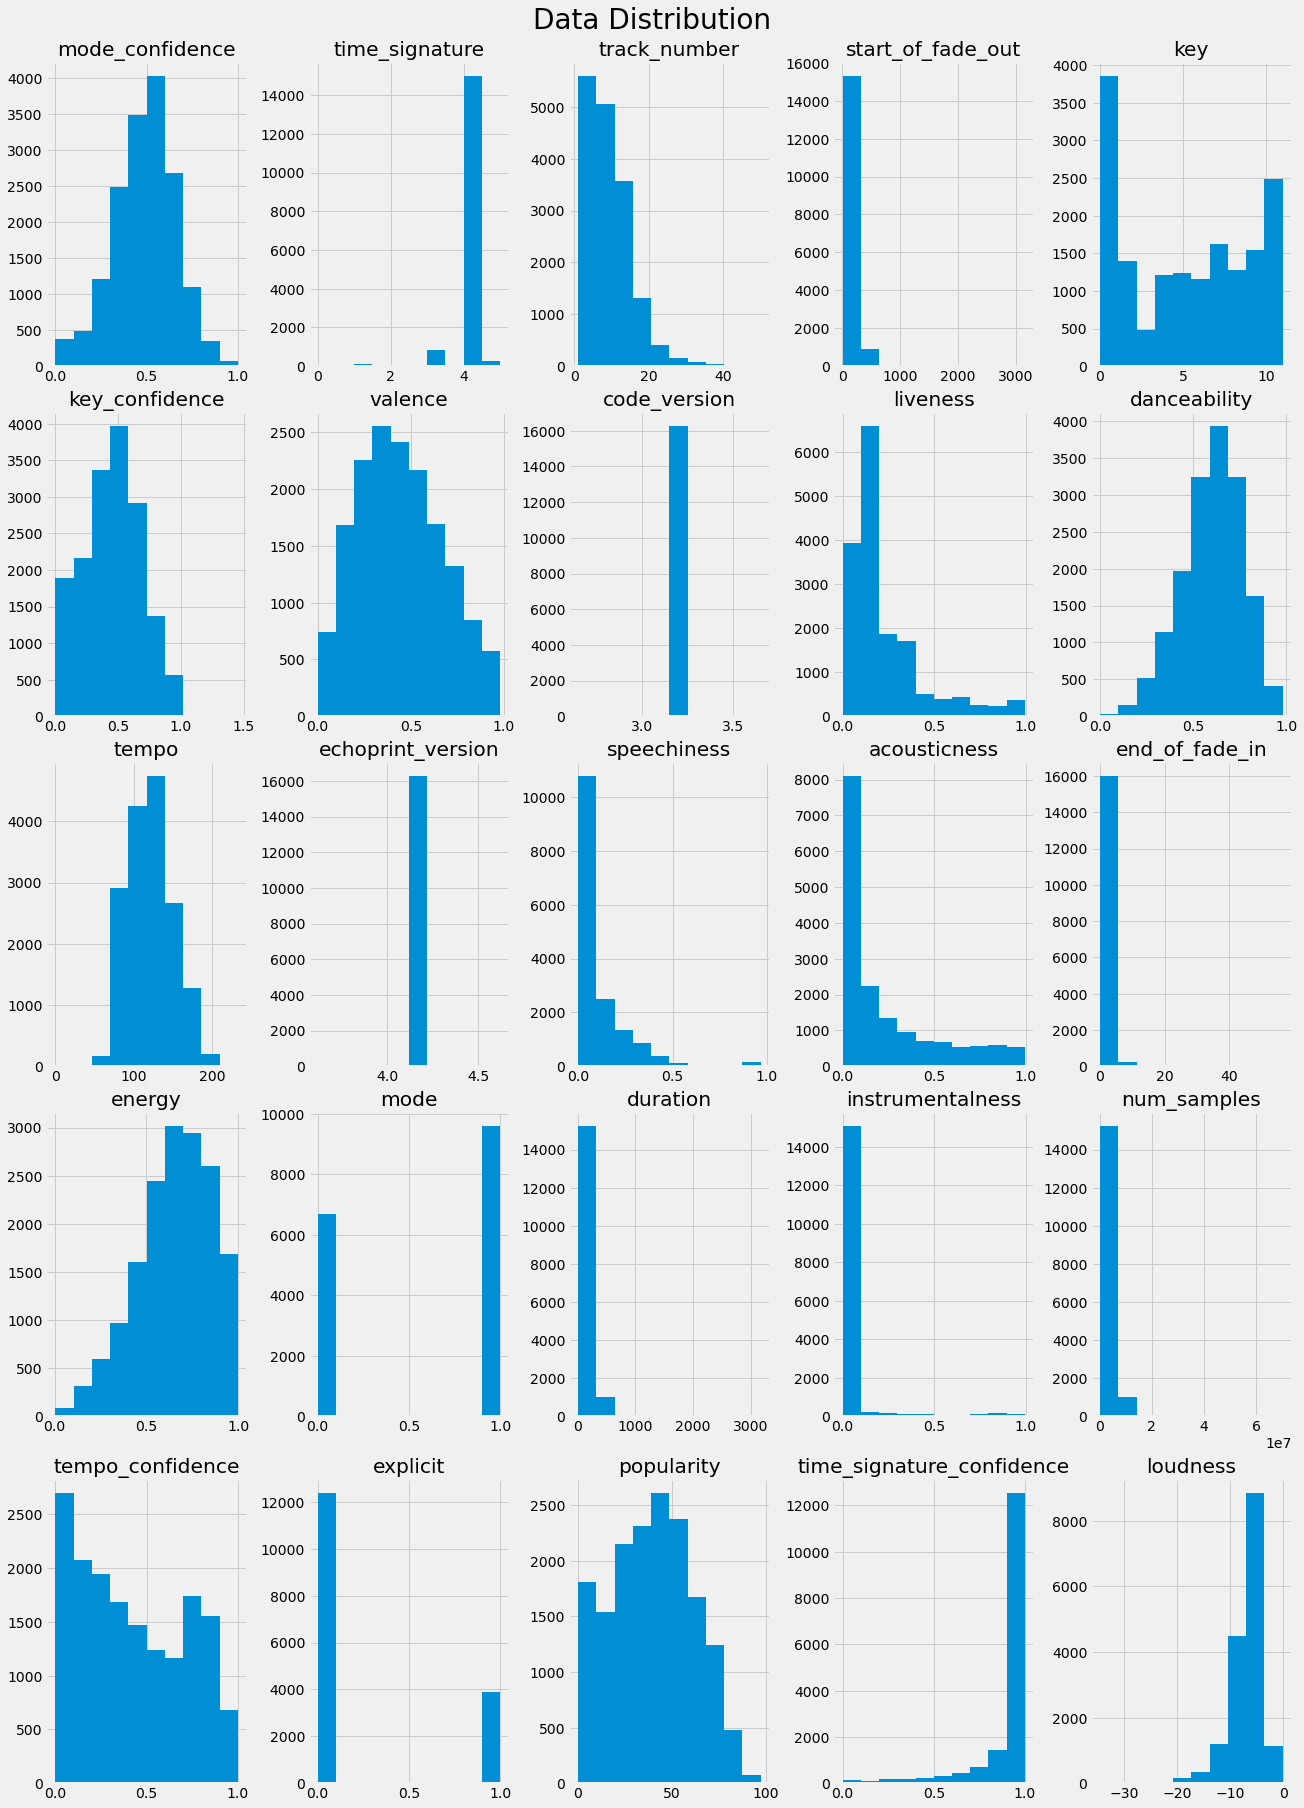

In [13]:
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(18,25),constrained_layout=True)
for i in range(len(num_cols)):
    axs[i%5][i//5].hist(df[num_cols[i]], bins=10)
    axs[i%5][i//5].set_title(num_cols[i])
fig.suptitle("Data Distribution", fontsize=28)
plt.show()

```instrumentalness```: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as<br>
instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value<br>
is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent<br>
instrumental tracks, but confidence is higher as the value approaches 1.0.<br>

```liveness```: Detects the presence of an audience in the recording. Higher liveness values represent an increased<br>
probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

In [14]:
correlation = df[num_cols].drop(['echoprint_version', 'code_version'],axis=1).corr()

In [15]:
mask = np.triu(np.ones_like(correlation, dtype=bool), k=1)

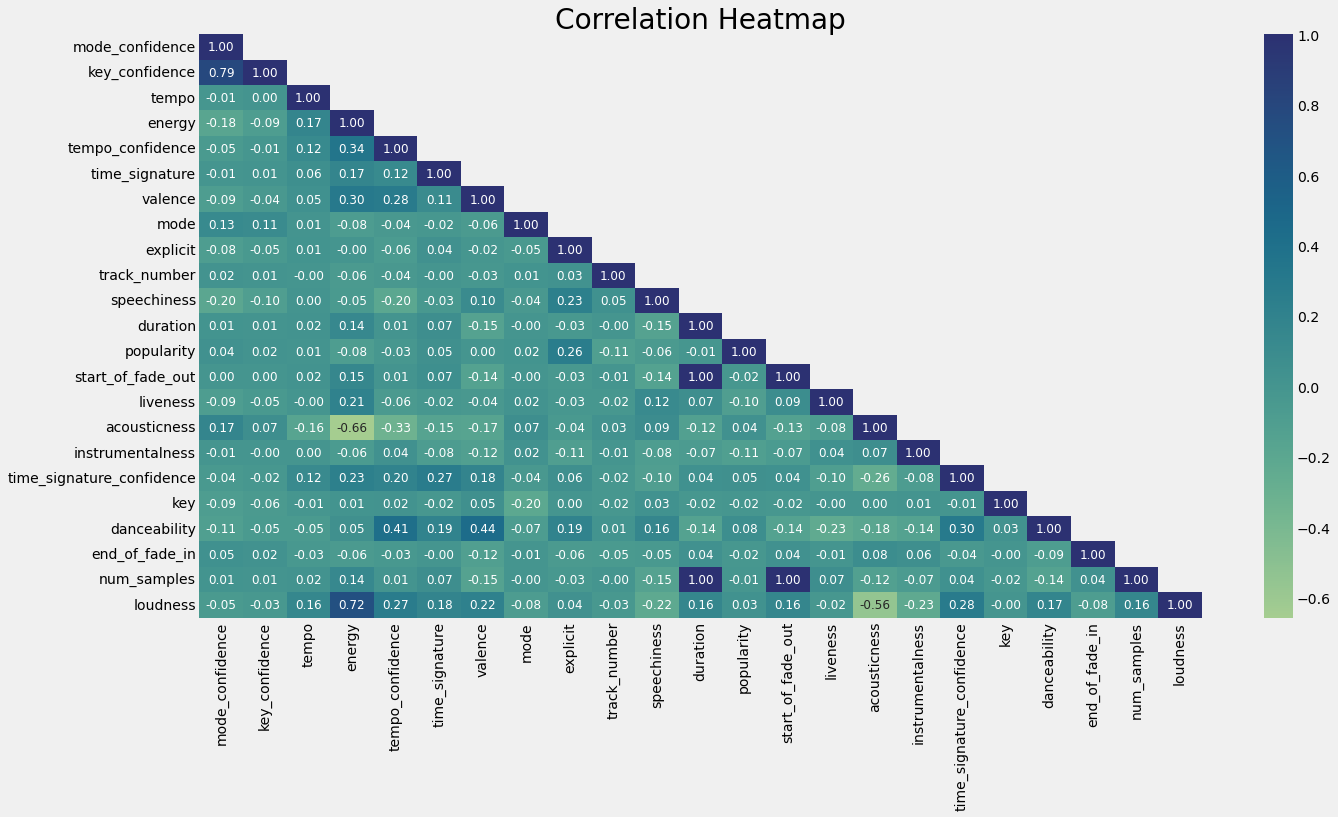

In [16]:
plt.figure(figsize=(20,10))
plt.title("Correlation Heatmap", fontdict={'fontsize':28})
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='crest', mask = mask,annot_kws={"size": 12})
plt.savefig("plots/corr_heatmap.png", bbox_inches='tight')
plt.show()

- `num_samples` is completely correlated with `duration`, `start_of_fade_out`
- `loudness` has strong positive correlation with `energy` and negative correlation with `acousticness`
<br>Hence, we can also observe that energy is negatively correlated with acousticness

In [17]:
cat_cols = ['time_signature', 'key', 'mode', 'explicit']

In [18]:
key_map = {0:'C', 1:'C#', 2:'D', 3:'D#', 4:'E', 5:'F', 6:'F#', 7:'G', 8:'G#', 9:'A', 10:'A#', 11:'B'}

In [19]:
df['key'] = df['key'].map(key_map)

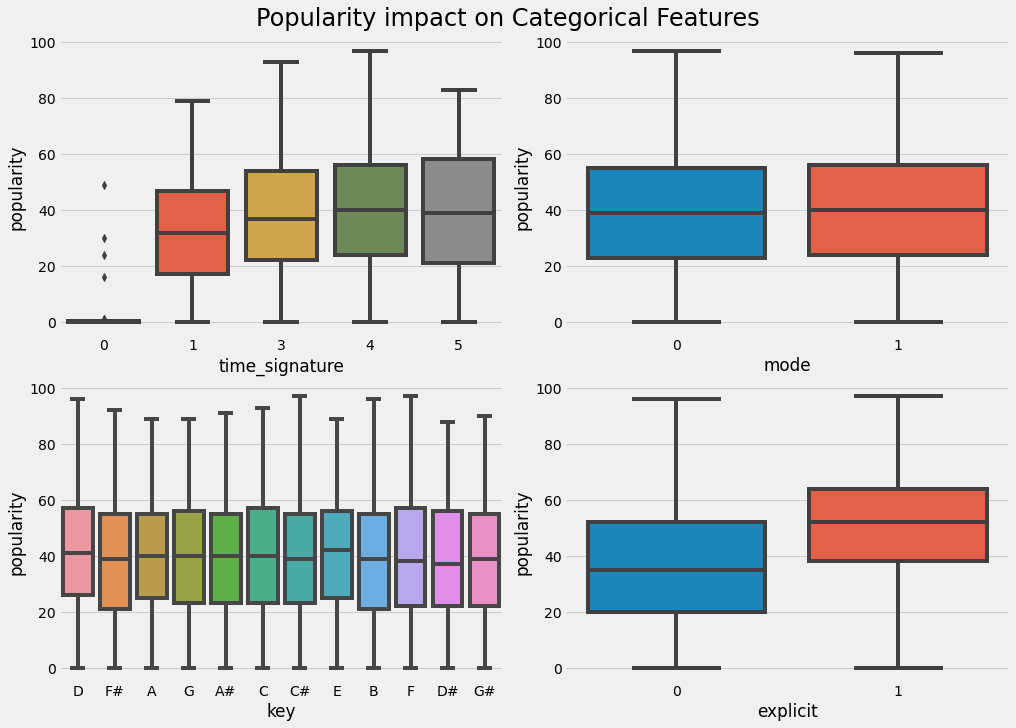

In [20]:
#plt.figure(figsize=(25,16), constrained_layout=True)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14,10),constrained_layout=True)
for idx,col in enumerate(cat_cols):
    plt.subplot(2,2,idx+1)
    sns.boxplot(x=df[col], y= df['popularity'],ax = axs[idx%2][idx//2])
fig.suptitle("Popularity impact on Categorical Features", fontsize=24)
plt.show()

### Observations
```time_signature```: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".>= 3 <= 7
- time_signature = 4 has the highest median popularity

```key```: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. Ranging from -1 to 11.
- All keys have similar median value for popularity

```mode```: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- Mode (Minor / Major) doesn't show any significant distinction 

```explicit```: It indicates the explicitness(explicit or not explicit) of the track. explicit is represented by 1 and not explicit by 0
- explicit = 1 has higher popularity than the explicit = 0

In [21]:
fig = make_subplots(rows=4, cols=2,
                   subplot_titles=("Loudness", "Energy", "Acousticness", "Tempo",
                                  "Valence", 'Duration', 'Danceability'),
                   y_title="Popularity")

fig.add_trace(
    go.Histogram2d(x=df["loudness"], y=df["popularity"], colorscale='Dense'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram2d(x=df["energy"], y=df["popularity"], colorscale='Dense'),
    row=1, col=2
)

fig.add_trace(
    go.Histogram2d(x=df["acousticness"], y=df["popularity"], colorscale='Dense'),
    row=2, col=1
)

fig.add_trace(
    go.Histogram2d(x=df["tempo"], y=df["popularity"], colorscale='Dense'),
    row=2, col=2
)

fig.add_trace(
    go.Histogram2d(x=df["valence"], y=df["popularity"], colorscale='Dense'),
    row=3, col=1
)

fig.add_trace(
    go.Histogram2d(x=df["duration"], y=df["popularity"], colorscale='Dense'),
    row=3, col=2
)
fig.add_trace(
    go.Histogram2d(x=df["danceability"], y=df["popularity"], colorscale='Dense'),
    row=4, col=1
)
fig.update_traces(showscale=False)
fig.update_layout(template = "plotly_dark",height=1000, width=950, title_text="Target Impact on Continuous Features")
fig.show()


- <b>The distribution of loudness is from -10 to 0 in which popularity is peaked around 25 to 65
- <b>High energy Songs have higher popularity</b>
- <b>Non acoustic songs are more popluar</b>
- <b>Tracks have a tempo around 100-150 and their popularity ranges from 20-50. Hence, most of the popular songs are medium paced</b>
- <b>Songs with medium valence are more popular i.e., songs that are neither too cheerful nor too sad.</b>
- <b>Most of the songs in the data have a duration around 180 to 240 seconds and popularity of these songs is around 25 to 50</b>
- <b>The dataset consists of Medium Danceable songs with a popularity around 40</b>

In [22]:
artist_with_most_songs = df['artist_names'].value_counts()[:10].reset_index()
artist_with_most_songs = artist_with_most_songs.rename(columns={'index':'Artist', 'artist_names':"Total Songs"})

In [23]:
fig = px.bar(artist_with_most_songs, x='Artist', y='Total Songs', color='Total Songs', text = 'Total Songs',
             title='Artists with most Songs', color_continuous_scale=px.colors.sequential.dense)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', template = "plotly_dark")
fig.show()

#### With Number of Songs equal to 540, `The Beatles` have the most songs

In [24]:
avg_popularity = df.groupby('artist_names', as_index=False)['popularity'].median().sort_values(by='popularity',
                                                                                               ascending=False)

In [25]:
fig = px.bar(avg_popularity[:10], x='artist_names', y='popularity', color='popularity', text = 'popularity',
             title='Artists With Highest Avg. Popularity', color_continuous_scale=px.colors.sequential.dense)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', template = "plotly_dark",
                 xaxis_title="Artist", yaxis_title="Popularity")
fig.show()

#### Top 3 Artists with Highest avg Popularity are Bad Bunny, Harry Styles, Billie Eillish

In [26]:
danceability = df.groupby('artist_names', as_index=False)['danceability'].mean().sort_values(by='danceability',
                                                                                             ascending=False)
danceability['danceability'] = round(danceability['danceability']*100)

In [27]:
fig = px.bar(danceability[:10], x='artist_names', y='danceability', color='danceability', text = 'danceability',
             title='Artists With Highest Danceability', color_continuous_scale=px.colors.sequential.dense)
fig.update_traces(texttemplate='%{text}%', textposition='outside')
fig.update_layout(template = "plotly_dark",xaxis_title="Artist", yaxis_title="Danceabiltiy")
fig.show()

```danceability```: Danceability describes how suitable a track is for dancing based on a combination of musical elements<br>
including tempo, rhythm stability, beat strength, and overall regularity.<br>
A value of 0.0 is least danceable and 1.0 is most danceable.
#### On an average 21 Savage have 83% danceability in their songs, Cardi B and Young Thug both 79% danceability in their songs

In [28]:
energy = df.groupby('artist_names', as_index=False)['energy'].mean().sort_values(by='energy',
                                                                                             ascending=False)
energy['energy'] = round(energy['energy']*100)

In [29]:
fig = px.bar(energy[:10], x='artist_names', y='energy', color='energy', text = 'energy',
             title='Artists With Highest Energy', color_continuous_scale=px.colors.sequential.dense)
fig.update_traces(texttemplate='%{text}%', textposition='outside')
fig.update_layout(template = "plotly_dark", xaxis_title="Artist", yaxis_title="Energy")
fig.show()

```energy```: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

#### Marshmello, Fall Out Boy, Pitbull, and Metallica have the highest percentage of energy in their songs

In [30]:
valence = df.groupby('artist_names', as_index=False)['valence'].mean().sort_values(by='valence',
                                                                                             ascending=False)
valence['valence'] = round(valence['valence']*100)

In [31]:
fig = px.bar(valence[:10], x='artist_names', y='valence', color='valence', text = 'valence',
             title='Artists With Highest Valence', color_continuous_scale=px.colors.sequential.dense)
fig.update_traces(texttemplate='%{text}%', textposition='outside')
fig.update_layout(template = "plotly_dark", xaxis_title="Artist", yaxis_title="Valence")
fig.show()

```valence```: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.<br>
Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with<br>
low valence sound more negative (e.g. sad, depressed, angry). >= 0 <= 1.
#### Artists with highest valence in their songs are J Balvin, Pitbull, Anuel AA

In [32]:
duration = df.groupby('artist_names', as_index=False)['duration'].median().sort_values(by='duration',
                                                                                             ascending=False)
duration['duration'] = duration['duration']/60

In [33]:
fig = px.bar(duration[:10], x='artist_names', y='duration', color='duration', text = 'duration',
             title='Artists With Highest Duration', color_continuous_scale=px.colors.sequential.dense)
fig.update_traces(texttemplate='%{text:.2} min', textposition='outside')
fig.update_layout(template = "plotly_dark", xaxis_title="Artist", yaxis_title="Duration")
fig.show()

```duration```: Length of the track.
#### Metallica have the songs with higest avg duration equal to 5.8 minutes.

In [34]:
acousticness = df.groupby('artist_names', as_index=False)['acousticness'].mean().sort_values(by='acousticness',
                                                                                             ascending=False)
acousticness['acousticness'] = round(acousticness['acousticness']*100)

In [35]:
fig = px.bar(acousticness[:10], x='artist_names', y='acousticness', color='acousticness', text = 'acousticness',
             title='Artists With Highest Acousticness', color_continuous_scale=px.colors.sequential.dense)
fig.update_traces(texttemplate='%{text:.2}%', textposition='outside')
fig.update_layout(template = "plotly_dark", xaxis_title="Artist", yaxis_title="Acousticness")
fig.show()

```acousticness```: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. Ranging from 0 to 1.

#### Billie Eillish, Sam Smith, Lana Del Rey and Adele have the highest acusticness in their songs

In [36]:
loudness = df.groupby('artist_names', as_index=False)['loudness'].mean().sort_values(by='loudness',ascending=False)
loudness['loudness'] = round(loudness['loudness'])

In [37]:
fig = px.bar(loudness[:10], x='artist_names', y='loudness', color='loudness', text = 'loudness',
             title='Artists With Highest Loudness', color_continuous_scale=px.colors.sequential.dense)
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(template = "plotly_dark", xaxis_title="Artist", yaxis_title="Loudness")
fig.show()

```loudness```: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

#### Marshmello, Anuel AA and Rauw Alejandro,their songs are more louder then any other artist's songs

In [38]:
tempo = df.groupby('artist_names', as_index=False)['tempo'].mean().sort_values(by='tempo',ascending=False)
tempo['tempo'] = round(tempo['tempo'])

In [39]:
fig = px.bar(tempo[:10], x='artist_names', y='tempo', color='tempo', text = 'tempo',
             title='Artists With Highest Tempo', color_continuous_scale=px.colors.sequential.dense)
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(template = "plotly_dark", xaxis_title="Artist", yaxis_title="Tempo")
fig.show()

```tempo```: The overall estimated tempo of a track in beats per minute (BPM).<br>
In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

#### Lil Nas X, Marshmello and Fall Out Boy have higher tempo in their songs